In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 189s 1us/step


In [ ]:
def create_model(regularization_type='l2', regularization_strength=0.01):
    if regularization_type == 'l2':
        regularizer = regularizers.l2(regularization_strength)
    elif regularization_type == 'l1':
        regularizer = regularizers.l1(regularization_strength)
    else:
        raise ValueError("Regularization type must be 'l2' or 'l1'")

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizer, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        layers.Dense(10, activation='softmax')
    ])

    return model

In [ ]:
def train_model(regularization_type='l2', regularization_strength=0.01):
    model = create_model(regularization_type, regularization_strength)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10,
                        validation_data=(x_test, y_test))

    return history

# Train models with L2 and L1 regularization
history_l2 = train_model(regularization_type='l2', regularization_strength=0.01)
history_l1 = train_model(regularization_type='l1', regularization_strength=0.01)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 57ms/step - accuracy: 0.2629 - loss: 2.2646 - val_accuracy: 0.3881 - val_loss: 1.8142
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 55ms/step - accuracy: 0.4046 - loss: 1.7855 - val_accuracy: 0.4508 - val_loss: 1.6966
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4476 - loss: 1.6899 - val_accuracy: 0.4703 - val_loss: 1.6573
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 54ms/step - accuracy: 0.4626 - loss: 1.6672 - val_accuracy: 0.4838 - val_loss: 1.6321
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 58ms/step - accuracy: 0.4882 - loss: 1.6245 - val_accuracy: 0.4786 - val_loss: 1.6386
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.5087 - loss: 1.5910 - val_accuracy: 0.5087 - val_loss: 1.5642
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 54ms/step - accuracy: 0.5199 - loss: 1.5687 - val_accuracy: 0.5258 - val_loss: 1.5506
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 54ms/step - accuracy: 0.5

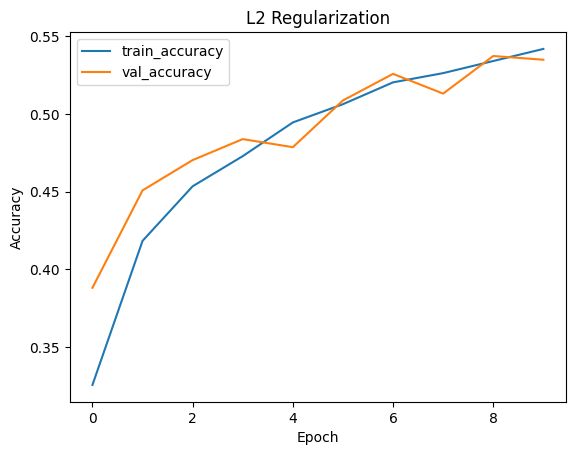

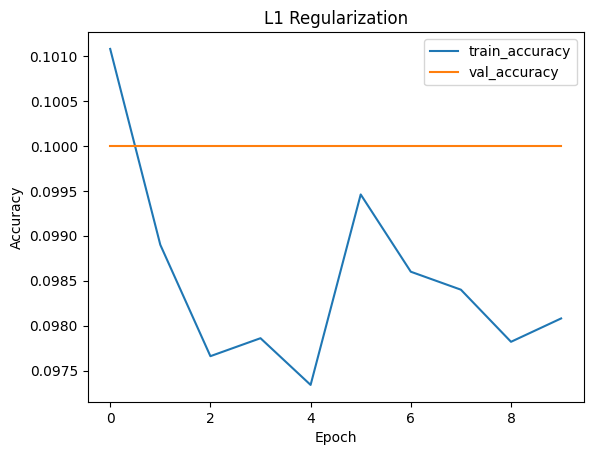

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history_l2, 'L2 Regularization')
plot_history(history_l1, 'L1 Regularization')

Training with L2 regularization strength: 0.001
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 56ms/step - accuracy: 0.3158 - loss: 1.9163 - val_accuracy: 0.4839 - val_loss: 1.4922
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 55ms/step - accuracy: 0.5209 - loss: 1.4254 - val_accuracy: 0.5470 - val_loss: 1.3926
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 56ms/step - accuracy: 0.5757 - loss: 1.3089 - val_accuracy: 0.5966 - val_loss: 1.2535
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6183 - loss: 1.2092 - val_accuracy: 0.6272 - val_loss: 1.1884
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 57ms/step - accuracy: 0.6459 - loss: 1.1548 - val_accuracy: 0.6513 - val_loss: 1.1408
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 56ms/step - accuracy: 0.6671 - loss: 1.0997 - val_accuracy: 0.6578 - val_loss: 1.1400
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.6823 - loss: 1.0664 - val_accuracy: 0.6737 - val_loss: 1.1075
Epoch 8/10
1563/1563 ━━

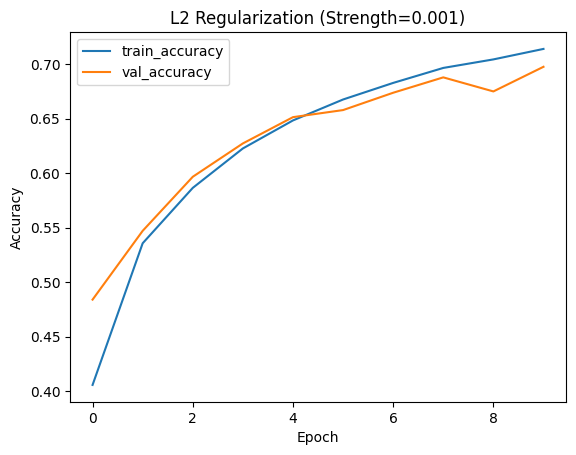

Training with L1 regularization strength: 0.001
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 57ms/step - accuracy: 0.2416 - loss: 2.6699 - val_accuracy: 0.3879 - val_loss: 1.8597
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 56ms/step - accuracy: 0.3819 - loss: 1.8453 - val_accuracy: 0.4010 - val_loss: 1.7890
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 59ms/step - accuracy: 0.4114 - loss: 1.7738 - val_accuracy: 0.4270 - val_loss: 1.7160
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 55ms/step - accuracy: 0.4291 - loss: 1.7245 - val_accuracy: 0.4344 - val_loss: 1.7121
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 54ms/step - accuracy: 0.4471 - loss: 1.6816 - val_accuracy: 0.4410 - val_loss: 1.6905
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0.4627 - loss: 1.6502 - val_accuracy: 0.4413 - val_loss: 1.6964
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 54ms/step - accuracy: 0.4630 - loss: 1.6358 - val_accuracy: 0.4707 - val_loss: 1.6087
Epoch 8/10
1563/1563 ━

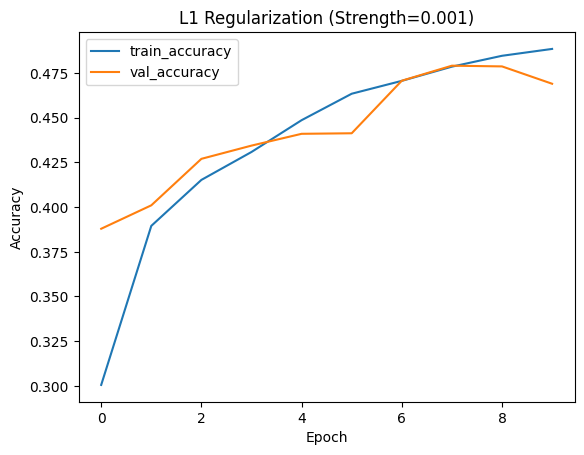

Training with L2 regularization strength: 0.01
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 56ms/step - accuracy: 0.2761 - loss: 2.2483 - val_accuracy: 0.4049 - val_loss: 1.8093
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.3977 - loss: 1.8020 - val_accuracy: 0.4442 - val_loss: 1.6995
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 54ms/step - accuracy: 0.4406 - loss: 1.7125 - val_accuracy: 0.4614 - val_loss: 1.6627
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 56ms/step - accuracy: 0.4708 - loss: 1.6587 - val_accuracy: 0.4793 - val_loss: 1.6320
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 55ms/step - accuracy: 0.4868 - loss: 1.6281 - val_accuracy: 0.5037 - val_loss: 1.5856
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - accuracy: 0.5043 - loss: 1.5959 - val_accuracy: 0.5029 - val_loss: 1.5701
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5115 - loss: 1.5700 - val_accuracy: 0.5335 - val_loss: 1.5163
Epoch 8/10
1563/1563 ━━━━

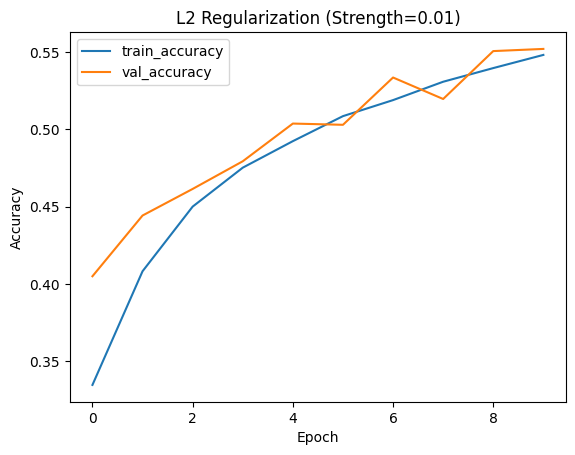

Training with L1 regularization strength: 0.01
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 57ms/step - accuracy: 0.1009 - loss: 6.2133 - val_accuracy: 0.1000 - val_loss: 2.4520
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.0984 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4522
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.0974 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4515
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.0991 - loss: 2.4526 - val_accuracy: 0.1000 - val_loss: 2.4532
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.0982 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4537
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.1034 - loss: 2.4525 - val_accuracy: 0.1000 - val_loss: 2.4527
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 57ms/step - accuracy: 0.0990 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4522
Epoch 8/10
1563/1563 ━━━━━━

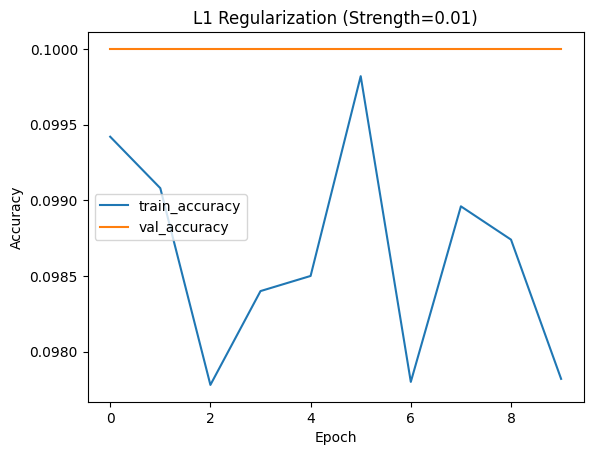

Training with L2 regularization strength: 0.1
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 57ms/step - accuracy: 0.0993 - loss: 3.9035 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.0998 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 56ms/step - accuracy: 0.0982 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 55ms/step - accuracy: 0.0966 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - accuracy: 0.0970 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 54ms/step - accuracy: 0.1015 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━

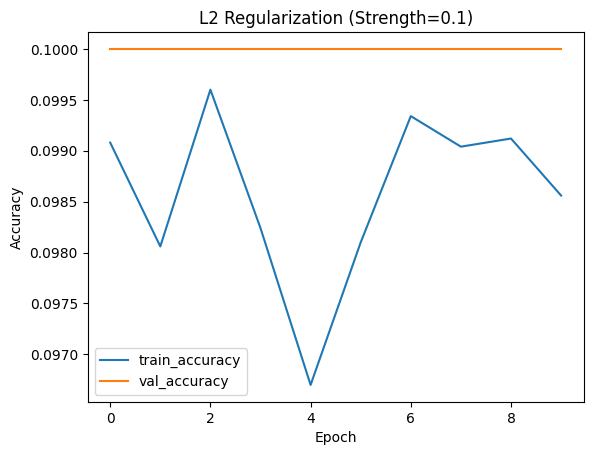

Training with L1 regularization strength: 0.1
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 58ms/step - accuracy: 0.0994 - loss: 41.1321 - val_accuracy: 0.1000 - val_loss: 3.8125
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 58ms/step - accuracy: 0.1003 - loss: 3.8124 - val_accuracy: 0.1000 - val_loss: 3.8176
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.1009 - loss: 3.8125 - val_accuracy: 0.1000 - val_loss: 3.7963
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 62ms/step - accuracy: 0.0986 - loss: 3.8124 - val_accuracy: 0.1000 - val_loss: 3.8213
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 58ms/step - accuracy: 0.1004 - loss: 3.8125 - val_accuracy: 0.1000 - val_loss: 3.8248
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 59ms/step - accuracy: 0.0982 - loss: 3.8122 - val_accuracy: 0.1000 - val_loss: 3.8185
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.0998 - loss: 3.8121 - val_accuracy: 0.1000 - val_loss: 3.8060
Epoch 8/10
1563/1563 ━━━━

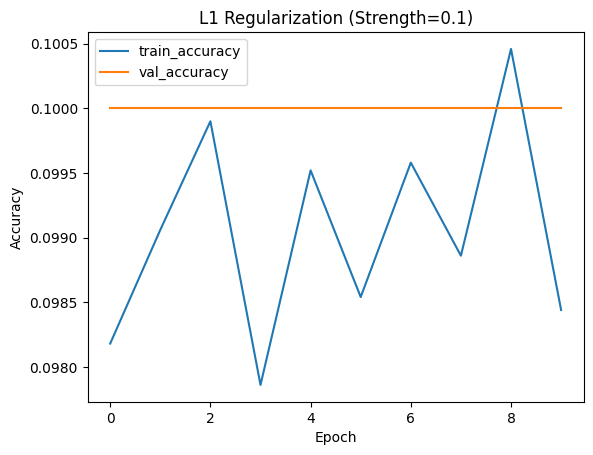

In [ ]:
regularization_strengths = [0.001, 0.01, 0.1]

for strength in regularization_strengths:
    print(f'Training with L2 regularization strength: {strength}')
    history_l2 = train_model(regularization_type='l2', regularization_strength=strength)
    plot_history(history_l2, f'L2 Regularization (Strength={strength})')

    print(f'Training with L1 regularization strength: {strength}')
    history_l1 = train_model(regularization_type='l1', regularization_strength=strength)
    plot_history(history_l1, f'L1 Regularization (Strength={strength})')

In [ ]:
Conclusion
L2 Regularization tends to perform better when you have many small/medium-sized features.
L1 Regularization can be more effective when you believe only a few features are important (i.e., it promotes sparsity).